These are the equations that model the Brusselator. 

$$\frac{dx}{dt} = A - (B + 1)x + x^2 y$$
$$\frac{dy}{dt} = Bx - x^2 y$$

In [7]:
from pprint import pprint
import numpy as np
from scipy.integrate import solve_ivp

# Equation Parameters
A = 1.0
B = 3.0

def vector_function(t, state):
    '''
    Returns a 2D vector containing the derivatives [dx/dt, dy/dt] of the current state.
    '''
    x, y = state
    dx_dt = A - (B + 1)*x + x**2 * y
    dy_dt = B*x - x**2 * y
    # Shape is defined by this return value.
    return [dx_dt, dy_dt]

t_start = 0
t_end = 50
time_span = (t_start, t_end)
t_points = np.linspace(t_start, t_end, num=50)
# x_0 = 1.2
# y_0 = 2.8
initial_conditions = (1.2, 2.8)

solutions = solve_ivp(
    vector_function,
    time_span,
    t_eval=t_points,
    y0=initial_conditions,
    method='RK45'
)

# The tolist() calls are so the arrays are printed as numbers instead of np.float64(value).
t_solutions = solutions.t.tolist()
x_solutions = solutions.y[0].tolist()
y_solutions = solutions.y[1].tolist()
grouped_solutions = list(zip(t_solutions, x_solutions, y_solutions))

Now, it's time to graph the solutions for $x$ and $y$ with respect to $t$.

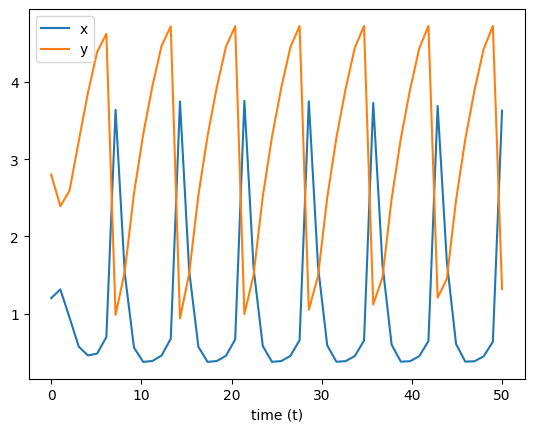

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel('time (t)')
ax.plot(t_points, x_solutions, label='x')
ax.plot(t_points, y_solutions, label='y')
ax.legend()
plt.show()